<a href="https://colab.research.google.com/github/nurali077n/QM2/blob/main/notebooks/W06.%20Hypothesis%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

## *Workshop 6*  [![Open In Colab](https://github.com/oballinger/QM2/blob/main/colab-badge.png?raw=1)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W06.%20Hypothesis%20Testing.ipynb)

For the rest of this course, we'll be working with data from the U.S. Census [Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps.html).

### Aims:

- Understanding:
    - Confidence Intervals
    - Hypothesis Testing
        1. Stating the Null and Alternative Hypotheses
        2. Selecting a Critical Value
        3. Calculating the Test Statistic
        4. Making a Decision

## Getting Started

We will be following on from the analysis we conducted in Workshop 5 (Distributions and Basic Statistics). We visually explored differences in the income levels between different groups of people in the US census. Now, we are going to conduct hypothesis testing to see if those differences are statistically significant.

In [1]:
!mkdir data
!mkdir data/wk7
!curl https://storage.googleapis.com/qm2/wk7/cps.csv -o data/wk7/cps.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.4M  100 22.4M    0     0  92.3M      0 --:--:-- --:--:-- --:--:-- 92.5M


In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [3]:
df=pd.read_csv('./data/wk7/cps.csv')
df['race']=df['race'].astype('category')
df['income']=df['incwage']/1000
df=df[df['income']<200]
df=df[df['year']==2013] # filter the dataframe to only contain 2013 data
df.head()

,year,state,age,sex,race,sch,ind,union,incwage,realhrwage,occupation,income
20,2013,50,62,1,1,14.0,8090,1.0,57000.0,23.889143,.,57.0
32,2013,39,59,1,1,13.0,9590,0.0,62000.0,29.726475,"Consruction, Extraction, Installation",62.0
34,2013,44,44,1,3,12.0,7290,0.0,45000.0,20.745834,.,45.0
36,2013,12,41,1,1,12.0,7070,1.0,28000.0,12.293828,Managers,28.0
37,2013,33,35,1,1,12.0,770,0.0,42500.0,20.377020,Transportation and materials moving,42.5


This is once again the U.S. census data from Week 5. As a reminder, our dataframe has 10 columns:

1. *year*: Survey year
2. *age*: the person's age
3. *sex*: the person's sex
    * 1=male
    * 2=female
4. *race*: the person's race
    * White non hispanic=1
    * Black non hispanic=2
    * Hispanic=3
    * Other non hispanic=4)
5. *sch*: Educational attainment
    * None = 0,
    * Grades 1-12 = 1-12
    * Some University = 13,
    * Associate's degree = 14,
    * BA = 16
    * Advanced Degree = 18
6. *union*: Union membership
    * N/A = 0,
    * No union coverage = 1,
    * Member of labor union=2,
    * Covered by union but not a member=3
7. *incwage*: Wage and salary income
8. *realhrwage*: Real Hourly Wage
9. *occupation*: Occupation
10. *ind*: [industry code](https://www.census.gov/naics/?58967?yearbck=2002)

## Confidence Intervals

So far in this workshop, we've had the luxury of being able to draw many random samples and plot the distributions of their sample means to infer the population mean. The Central Limit Theorem lets us assume that these sample means are normally distributed, and consequently that there is a 95.45% chance that the **population mean** within two standard errors of the **sample mean**. This allows us to make inferences on the basis of *a single sample*. The standard error is the

### Sample Standard Deviation
$$\huge s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2}$$

### Standard Error
$$\huge se = \frac{s}{\sqrt{n}}$$

Given a large enough sample $x$, we can build a 95% confidence interval as follows:

$$ \huge 95\% CI = \overline{x} \pm (1.96 \times se)$$

Let's draw a sample of 1000 random individuals from our data, and compute a 95% confidence interval to estimate the population mean for income. We'll begin by creating a swarmplot to get a sense of how the data are distributed.

Text(0.5, 1.0, 'Income Distribution')

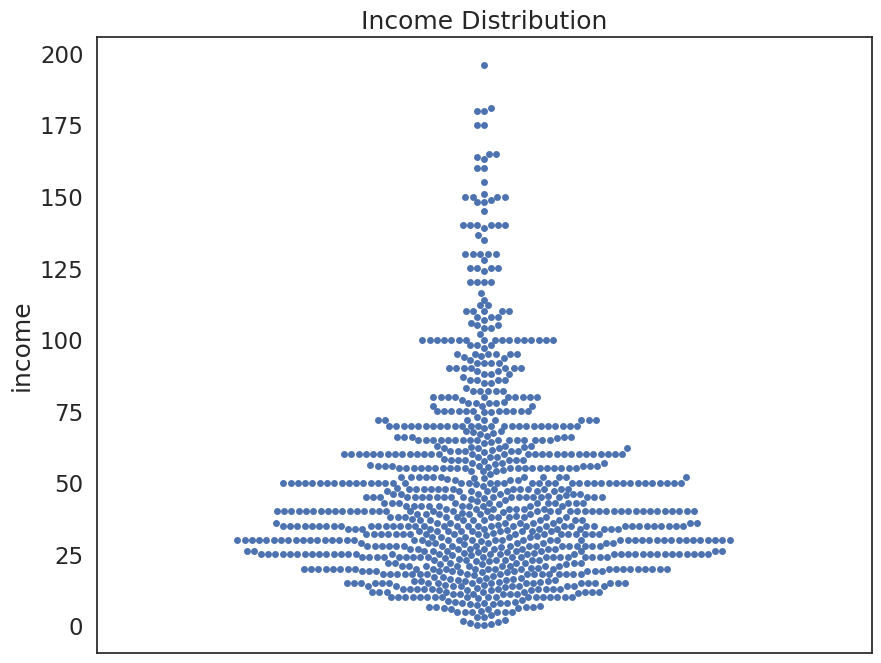

In [4]:
sample=df.sample(1000) # draw a random sample of 1000 observations from the dataframe
sns.swarmplot(data = sample, y='income') # plot a swarmplot of income
plt.title('Income Distribution') # add a title

Now let's set about calculating the 95% confidence interval and plotting it on our swarmplot. Luckily, the components we need to this are easy to calculate. We just need the mean, standard deviation, and number of observations. All of these are provided by the `.describe()` function, which calculates summary statistics for a sample.

In [5]:
desc=sample['income'].describe() # calculate descriptive statistics for the sample
print(desc) # print the descriptive statistics

count    1000.000000
mean       46.939816
std        32.519043
min         0.300000
25%        25.000000
50%        40.000000
75%        60.000000
max       196.000000
Name: income, dtype: float64


From the set of descriptive statistics, we can pull out the relevant components, calculate the standard error, and create a 95% confidence interval as follows:

In [6]:
mean=desc['mean'] # set the mean equal to a variable called "mean"
std=desc['std'] # set the standard deviation equal to a variable called "std"
n=desc['count'] # set the sample size equal to a variable called "n"
se=std/np.sqrt(n) # calculate the standard error of the mean

print('The mean is', round(mean, 2), 'with a standard error of', round(se, 2)) # print the mean and standard error

upper_ci = mean+se*1.96 # calculate the upper confidence interval
lower_ci = mean-se*1.96 # calculate the lower confidence interval

print('The 95% confidence interval is', round(lower_ci, 2), 'to', round(upper_ci, 2)) # print the confidence interval

The mean is 46.94 with a standard error of 1.03
The 95% confidence interval is 44.92 to 48.96


Finally, let's plot these bounds on our swarmplot to graphically show this range. We can now claim that based on our sample, there is a 95% chance that the true population mean of income (shown in red) lies within this range.

Text(0.5, 1.0, 'Income Distribution, 95% Confidence Interval')

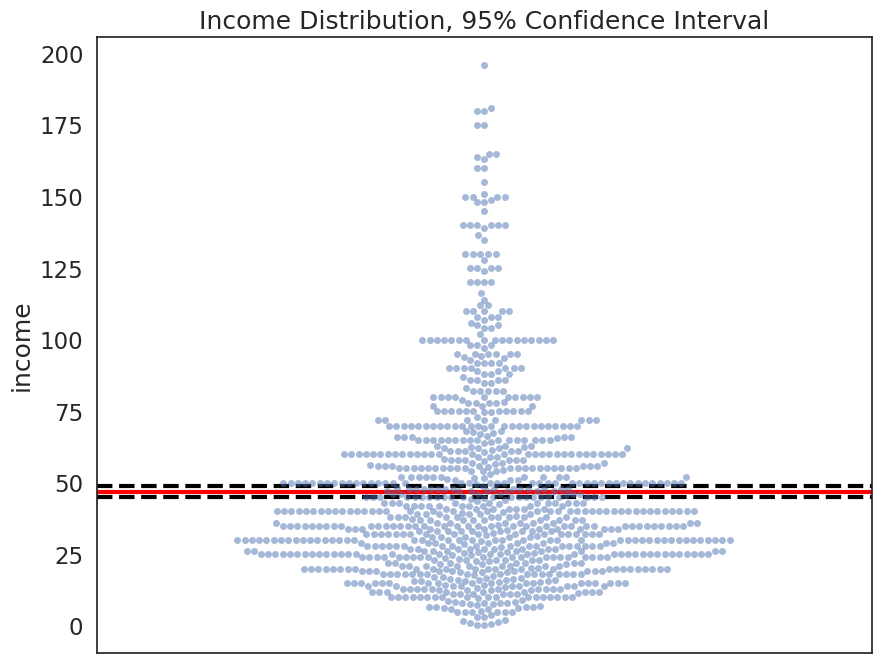

In [7]:
sns.swarmplot(data = sample, y='income',alpha=0.5) # plot a swarmplot of income
plt.axhline(df['income'].mean(), color='red', linestyle='solid', linewidth=3, label='Population Mean') # add a horizontal line at the mean
plt.axhline(upper_ci, color='black', linestyle='dashed', linewidth=3) # add a dashed black line at the upper confidence interval
plt.axhline(lower_ci, color='black', linestyle='dashed', linewidth=3) # add a dashed black line at the lower confidence interval

plt.title('Income Distribution, 95% Confidence Interval') # add a title

## Hypothesis Testing

If we create a boxplot of income disaggregated by sex using our sample, we can observe that men seem to earn more than women:

/tmp/ipython-input-3569932676.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(data=sample , x='sex', y='income').set_xticklabels(['Men','Women']) # make a box plot of income by sex


[Text(0, 0, 'Men'), Text(1, 0, 'Women')]

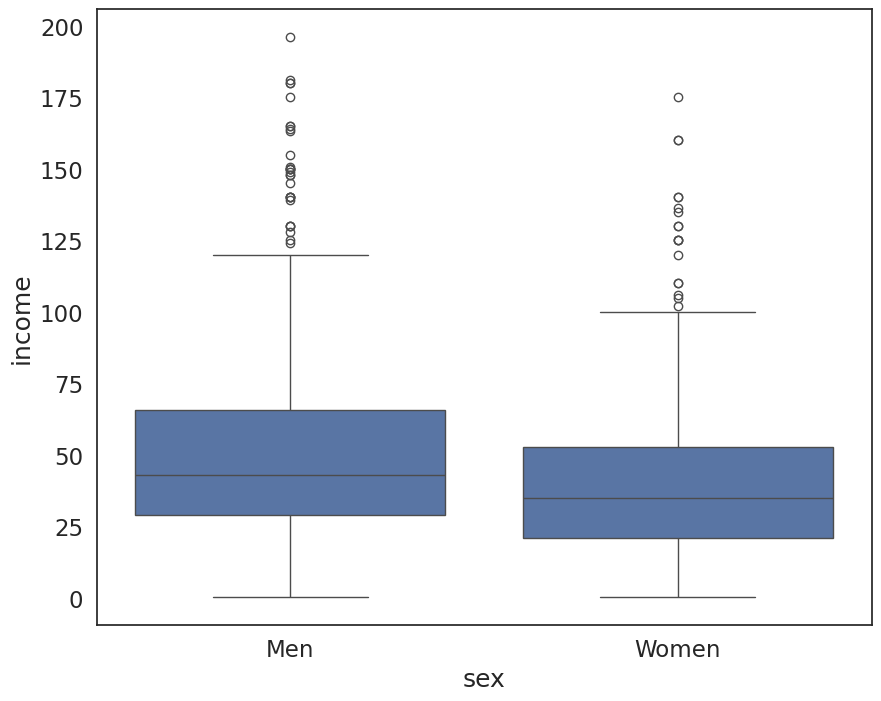

In [8]:
sns.boxplot(data=sample , x='sex', y='income').set_xticklabels(['Men','Women']) # make a box plot of income by sex

But is this difference statistically significant? It could just be due to sampling error, random chance. **Hypothesis testing** provides a framework through which we can formally evaluate the likelihood of encountering an effect as extreme (in this case, the the difference between the mean incomes between both groups) as the one we observe in our data. There are four main steps in hypothesis testing:

1. State the hypotheses. H0 states that there is no difference between the two population means.
2. Select an $\alpha$ level (e.g. 95% confidence), and select a corresponding **critical value** (1.96 for large samples)
3. Compute the test statistic.
4. Make a decision; if the test statistic exceeds the critical value, we **reject the null hypothesis**.

Steps 1, 2, and 4 remain fairly constant regardless of what kind of hypothesis testing you're conducting. Step 3 can vary quite a bit, as there are many different statistical tests that fall under the umbrella of hypothesis testing. In today's workshop we'll be using the Student's T-Test (more on that in a second). For now, let's begin the process of hypothesis testing a

### 1. State the hypotheses

#### The Null Hypothesis
* $H_0$ : There is no difference in the mean income between men and women
* $H_0$ : $\overline{x}_{men} = \overline{x}_{women}$

#### The Alternative Hypothesis
* $H_a$ : There is a difference in the mean income between men and women
* $H_a$ : $\overline{x}_{men} \neq \overline{x}_{women}$

### 2. Select an $\alpha$ level

Locate the critical region; the critical values for the t statistic are obtained using degrees of freedom ($df=n-2$). Given that we have 1000 observations, $df=998$. If $df>1000$, you can simply memorize the following critical values:

* At the 95% confidence level, the critical value is 1.96
* At the 99% confidence level, the critical value is 2.58

If our test statistic exceeds either of these values, we can reject the null hypothesis with the according level of confidence. The function below creates a plot which provides a visual reference for these values, but isn't really necessary for the process of hypothesis testing. The function accepts one argument `test_statistic`, which it will use to plot a vertical red line. If the red line falls within the dotted lines, we fail to reject the null hypothesis at the corresponding confidence level. If it's outside of these bounds, we reject the null hypothesis.

In the last line of code below, i've called the function to plot a test statistic of -2.3; Would we reject the null hypothesis at the 95% confidence level? what about the 99% level?

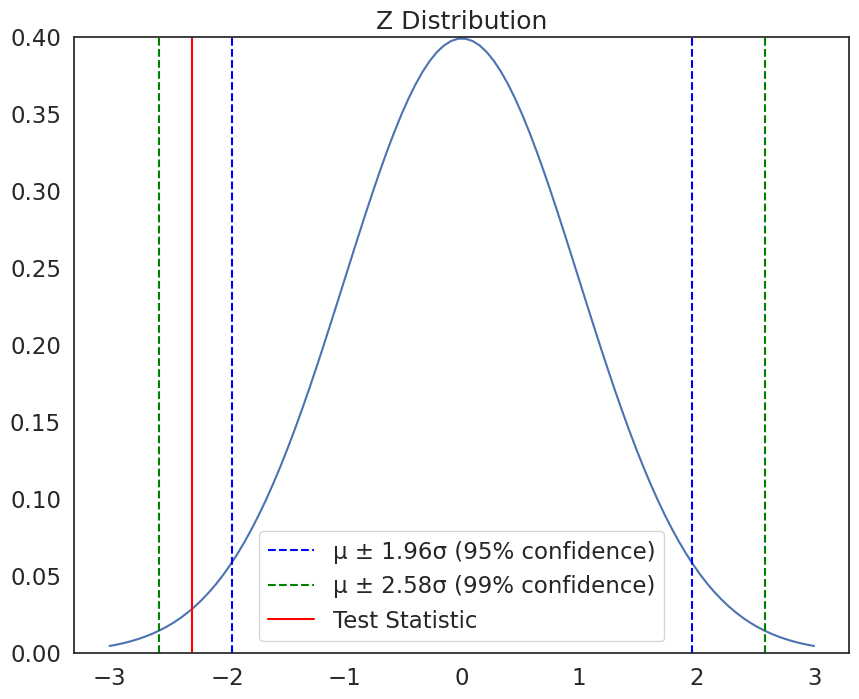

In [9]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.96, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.96, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations
    plt.axvline(mu-se*2.58, color='green', linestyle='dashed', linewidth=1.5,label='µ ± 2.58σ (99% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*2.58, color='green', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

plot_z(-2.3)

### 3. Calculate the Test Statistic (The Student's T-Test)

The Student's T-Test is an *independent-measures design* which is used in situations where a researcher has no prior knowledge about either of the two populations (or treatments) being compared.  In particular, the population means and standard deviations are all unknown. Because the population variances are not known, these values must be estimated from the sample data.

The purpose of a T-test is to determine whether the sample mean difference indicates a real mean difference between the two populations or whether the obtained difference is simply the result of sampling error. Given two groups, $x_1$ and $x_2$, the $t$ statistic is calculated as:

$$ \Huge t = {\frac{\overline{x_1}-\overline{x_2}} {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}} $$

Where:

* $\overline{x}$: Sample Mean
* $s^2$: Sample Standard Deviation
* $n$: Number of observations

We've already seen how to calculate each of these components when we made the 95% confidence interval above using the `.describe()` function. To calculate the t-statistic, we just have to plug these values into the formula above and do some basic arithmetic. I've put together a function that does this below, which accepts two main arguments, `group1` and `group2`. For each group it calculates descriptive statistics, and uses these values to calculate the t-statistic. It also has an optional argument `plot`, which when set to `True` will plot a 95% confidence interval for each group. It defaults to `False`, meaning that it won't generate the plot.

In [10]:
def manual_ttest(group1, group2, plot=False): # define a function called "manual_ttest" that takes two groups and a boolean value for whether or not to plot the results as arguments

    desc1, desc2=group1.describe(), group2.describe() # get descriptive statistics for both samples

    n1,std1,mean1 = desc1['count'], desc1['std'] ,desc1['mean'] # get the sample size, standard deviation, and mean of the first sample
    n2,std2,mean2 = desc2['count'], desc2['std'] ,desc2['mean'] # get the sample size, standard deviation, and mean of the second sample

    # calculate standard errors
    se1, se2 = std1**2/n1, std2**2/n2 # '**2' is the same as squaring the number

    # standard error on the difference between the samples
    sed = np.sqrt(se1 + se2)

    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed

    # print the results
    print("Group 1: n=%.0f, mean=%.3f, std=%.3f" % (n1,mean1,std1))
    print("Group 2: n=%.0f, mean=%.3f, std=%.3f" % (n2,mean2,std2))
    print('The t-statistic is %.3f' % t_stat) # print the t-statistic

    if plot==True: # if the plot argument is set to True, plot the results
        groups=pd.DataFrame() # create an empty dataframe
        i=1 # create a counter variable called "i" and set it equal to 1

        for group in [group1, group2]: # loop through each group in the list of groups
            plot_df=pd.DataFrame({'Values': group,'Group':i}) # create a dataframe with the values of the group and a column called "Group" that contains the group number
            groups=groups.append(plot_df) # append the dataframe to the list of dataframes
            i+=1 # increase the counter by 1

        sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval
        plt.title('Comparison of Group Means with 95% Confidence Intervals') # add a title

    return t_stat # return the t-statistic

Having defined the function, we can now call it to calculate a t-test for the difference in income between men and women

In [11]:
men=sample[sample['sex']==1] # filter the sample to only include men
women=sample[sample['sex']==2] # filter the sample to only include women

t = manual_ttest(men['income'],women['income']) # run the t-test function and store the t-statistic in a variable called "t"

Group 1: n=522, mean=52.572, std=35.227
Group 2: n=478, mean=40.789, std=28.048
The t-statistic is 5.875


### 4. Make a Decision

If the t statistic indicates that the obtained difference between sample means (numerator) is substantially greater than the difference expected by chance (denominator), we reject H0 and conclude that there is a real mean difference between the two populations or treatments. Let plot the T-statistic from our test against the critical values:

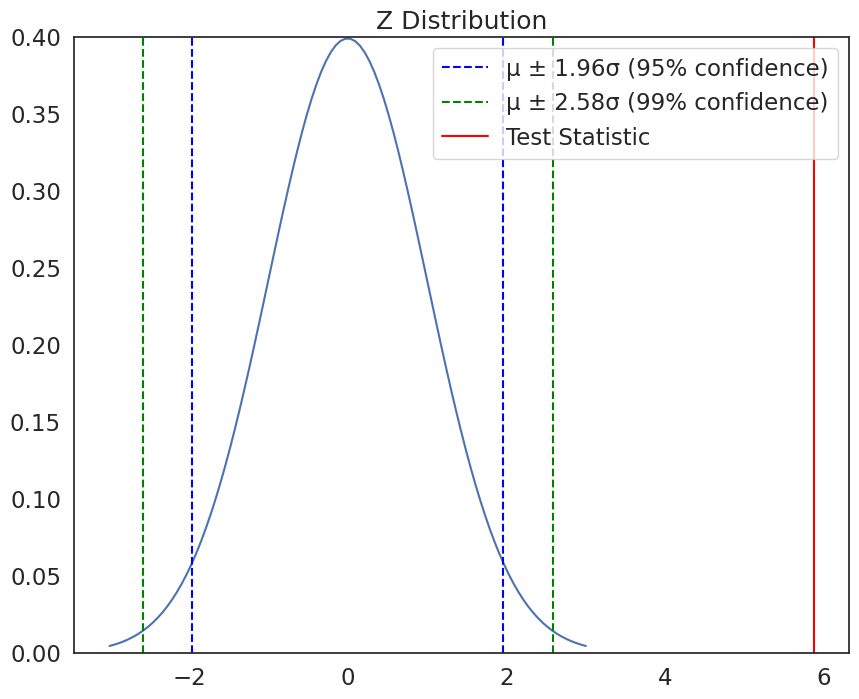

In [12]:
plot_z(t) # plot the test statistic on the z distribution

Based on the plot above, can we reject the null hypothesis that there is no difference in mean income between men and women?

### Exercise

1. From the main dataframe `df`, draw a sample of 500 white men. Using t-tests, investigate whether there are statistically significant discrepancies in pay between white men and other groups (note: it would be best to sample 500 people in each of those groups as well). Between what groups does there exist the most significant pay gap?
2. Some of this variation may be due to occupation. Compare income disparities between men and women within different occupations. Which occupation has the largest pay gap? which has the smallest?
3. [Research suggests](https://journals.sagepub.com/doi/abs/10.1177/0730888401028004005) that within occupational groups, collective bargaining through union membership reduces pay gaps. Read the abstract of this article, and try to replicate the analysis using our dataset.

## Assessed question

Which occupation has the lowest income disparity between men and women? Use a For Loop and the `manual_ttest()` function, and ignore the "." category.

# Task
```python
# Sample White Men (race=1, sex=1)
white_men_df = df[(df['race'] == 1) & (df['sex'] == 1)]
# Sample 500 individuals, or all if fewer than 500
white_men_sample = white_men_df.sample(n=min(500, len(white_men_df)), random_state=42)

# Prepare mappings for descriptive group names
race_map = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other non-Hispanic'}
sex_map = {1: 'Men', 2: 'Women'}

# Identify and Sample Other Groups
unique_groups = df[['race', 'sex']].drop_duplicates()
other_groups_samples = {}

for index, row in unique_groups.iterrows():
    race_val = row['race']
    sex_val = row['sex']

    # Skip the 'White Men' group, as it's our reference
    if race_val == 1 and sex_val == 1:
        continue

    group_df = df[(df['race'] == race_val) & (df['sex'] == sex_val)]
    
    group_name = f"{race_map.get(race_val, f'Race {race_val}')} {sex_map.get(sex_val, f'Sex {sex_val}')}"
    
    # Sample 500 individuals, or all if fewer
    if len(group_df) > 0:
        other_groups_samples[group_name] = group_df.sample(n=min(500, len(group_df)), random_state=42)

# Perform T-Tests and Store Results
t_test_results = {}
print("--- Performing t-tests against White Men's income ---")

# Ensure the reference group (white men) has enough data for t-tests
if len(white_men_sample) < 2:
    print("\nError: White Men sample is too small to perform t-tests (requires at least 2 individuals).")
else:
    for group_name, other_sample_df in other_groups_samples.items():
        # Ensure the current 'other group' has enough data for t-tests
        if len(other_sample_df) < 2:
            print(f"\nSkipping t-test for '{group_name}' due to insufficient sample size (<2 individuals).")
            continue
        
        print(f"\n--- Comparison: White Men vs. {group_name} ---")
        try:
            # The manual_ttest function prints its own details and returns the t-statistic
            t_stat = manual_ttest(white_men_sample['income'], other_sample_df['income'])
            t_test_results[group_name] = abs(t_stat)
        except Exception as e:
            print(f"An error occurred while performing t-test for {group_name}: {e}")

# Identify Most Significant Pay Gap
print("\n--- Summary of Pay Gap Analysis ---")
if t_test_results:
    most_significant_group = max(t_test_results, key=t_test_results.get)
    max_t_stat = t_test_results[most_significant_group]

    # Output Results
    print(f"\nThe group with the most statistically significant pay gap compared to White Men is:")
    print(f"- Group: {most_significant_group}")
    print(f"- Absolute T-statistic: {max_t_stat:.3f}")
else:
    print("\nNo valid t-test results were generated to identify the most significant pay gap.")

```

## Sample White Men

### Subtask:
Filter the main dataframe 'df' to select white men (race=1, sex=1) and then draw a sample of 500 individuals. Store this sample in a variable.


**Reasoning**:
First, I will filter the main dataframe `df` to select only white men (race=1 and sex=1). Then, I will draw a sample of 500 individuals from this filtered dataframe, ensuring reproducibility with `random_state=42` and handling cases where there are fewer than 500 individuals.



In [14]:
white_men_df = df[(df['race'] == 1) & (df['sex'] == 1)]
white_men_sample = white_men_df.sample(n=min(len(white_men_df), 500), random_state=42)
print(f"Number of white men in the sample: {len(white_men_sample)}")
white_men_sample.head()

Number of white men in the sample: 500


,year,state,age,sex,race,sch,ind,union,incwage,realhrwage,occupation,income
80220,2013,5,30,1,1,12.0,170,1.0,34000.0,15.674630,"Farming, Fishing & Forestry",34.0
55765,2013,2,33,1,1,16.0,7870,0.0,65000.0,21.793604,.,65.0
21179,2013,42,31,1,1,18.0,7860,0.0,46500.0,21.437363,.,46.5
121862,2013,45,51,1,1,12.0,2870,0.0,20000.0,9.988735,"Consruction, Extraction, Installation",20.0
114873,2013,32,39,1,1,18.0,6190,0.0,20000.0,7.683642,Transportation and materials moving,20.0


## Identify and Sample Other Groups

### Subtask:
Iterate through all unique combinations of 'race' and 'sex' in the main dataframe 'df'. For each combination that is not 'white men', filter the 'df' to create a subgroup and draw a sample of 500 individuals from it. Store these samples in a dictionary or list, associating each sample with its group description (e.g., 'White Women', 'Black Men'). Handle cases where a group has fewer than 500 individuals by taking all available.


**Reasoning**:
First, I will create the `race_map` and `sex_map` dictionaries to translate numerical codes into descriptive names. Then, I will iterate through all unique combinations of race and sex in the main dataframe `df`. For each combination, I will check if it's not 'white men' (race=1, sex=1). If it's a different group, I will filter the `df` to get the subgroup, generate a descriptive name, and sample up to 500 individuals from it (or all if fewer are available), storing these samples in `other_groups_samples`.



In [15]:
race_map = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other non-Hispanic'}
sex_map = {1: 'Men', 2: 'Women'}

unique_groups = df[['race', 'sex']].drop_duplicates()
other_groups_samples = {}

for index, row in unique_groups.iterrows():
    race_val = row['race']
    sex_val = row['sex']

    # Skip the 'White Men' group, as it's our reference
    if race_val == 1 and sex_val == 1:
        continue

    group_df = df[(df['race'] == race_val) & (df['sex'] == sex_val)]

    group_name = f"{race_map.get(race_val, f'Race {race_val}')} {sex_map.get(sex_val, f'Sex {sex_val}')}"

    # Sample 500 individuals, or all if fewer
    if len(group_df) > 0:
        other_groups_samples[group_name] = group_df.sample(n=min(len(group_df), 500), random_state=42)
    else:
        print(f"Warning: No data for group: {group_name}")

print(f"Generated samples for {len(other_groups_samples)} other groups.")
for group_name, sample_df in other_groups_samples.items():
    print(f"- {group_name}: {len(sample_df)} individuals")

Generated samples for 7 other groups.
- Hispanic Men: 500 individuals
- Black Men: 500 individuals
- Other non-Hispanic Men: 500 individuals
- Other non-Hispanic Women: 500 individuals
- White Women: 500 individuals
- Black Women: 500 individuals
- Hispanic Women: 500 individuals


**Reasoning**:
Now that all groups have been sampled, I will iterate through each of the 'other_groups_samples', perform a t-test against the 'white_men_sample' using the `manual_ttest` function, and store the absolute t-statistic for each comparison in a dictionary. This will help identify the most significant pay gap later.



In [16]:
t_test_results = {}
print("--- Performing t-tests against White Men's income ---")

# Ensure the reference group (white men) has enough data for t-tests
if len(white_men_sample) < 2:
    print("\nError: White Men sample is too small to perform t-tests (requires at least 2 individuals).")
else:
    for group_name, other_sample_df in other_groups_samples.items():
        # Ensure the current 'other group' has enough data for t-tests
        if len(other_sample_df) < 2:
            print(f"\nSkipping t-test for '{group_name}' due to insufficient sample size (<2 individuals).")
            continue

        print(f"\n--- Comparison: White Men vs. {group_name} ---")
        try:
            # The manual_ttest function prints its own details and returns the t-statistic
            t_stat = manual_ttest(white_men_sample['income'], other_sample_df['income'])
            t_test_results[group_name] = abs(t_stat)
        except Exception as e:
            print(f"An error occurred while performing t-test for {group_name}: {e}")

--- Performing t-tests against White Men's income ---

--- Comparison: White Men vs. Hispanic Men ---
Group 1: n=500, mean=56.214, std=34.412
Group 2: n=500, mean=38.018, std=26.993
The t-statistic is 9.303

--- Comparison: White Men vs. Black Men ---
Group 1: n=500, mean=56.214, std=34.412
Group 2: n=500, mean=43.005, std=29.369
The t-statistic is 6.529

--- Comparison: White Men vs. Other non-Hispanic Men ---
Group 1: n=500, mean=56.214, std=34.412
Group 2: n=500, mean=58.739, std=38.834
The t-statistic is -1.088

--- Comparison: White Men vs. Other non-Hispanic Women ---
Group 1: n=500, mean=56.214, std=34.412
Group 2: n=500, mean=43.050, std=31.762
The t-statistic is 6.286

--- Comparison: White Men vs. White Women ---
Group 1: n=500, mean=56.214, std=34.412
Group 2: n=500, mean=41.216, std=28.466
The t-statistic is 7.509

--- Comparison: White Men vs. Black Women ---
Group 1: n=500, mean=56.214, std=34.412
Group 2: n=500, mean=38.107, std=27.411
The t-statistic is 9.203

--- Compa

**Reasoning**:
Now that all t-test results are computed and stored, I will identify the group with the highest absolute t-statistic to determine which group has the most statistically significant pay gap compared to White Men. Then, I will print this result.



In [17]:
print("\n--- Summary of Pay Gap Analysis ---")
if t_test_results:
    most_significant_group = max(t_test_results, key=t_test_results.get)
    max_t_stat = t_test_results[most_significant_group]

    # Output Results
    print(f"\nThe group with the most statistically significant pay gap compared to White Men is:")
    print(f"- Group: {most_significant_group}")
    print(f"- Absolute T-statistic: {max_t_stat:.3f}")
else:
    print("\nNo valid t-test results were generated to identify the most significant pay gap.")


--- Summary of Pay Gap Analysis ---

The group with the most statistically significant pay gap compared to White Men is:
- Group: Hispanic Women
- Absolute T-statistic: 12.917


## Summary:

### Data Analysis Key Findings

*   A sample of 500 White Men was extracted as the reference group for income comparison.
*   Samples were generated for 7 other distinct demographic groups (e.g., Black Men, White Women, Hispanic Women), each containing up to 500 individuals.
*   T-tests were conducted to compare the income of each of these 7 groups against the income of White Men.
*   Significant income disparities were observed across several groups:
    *   Hispanic Men showed a t-statistic of 9.303 when compared to White Men.
    *   Black Men showed a t-statistic of 6.529 when compared to White Men.
    *   Hispanic Women showed a t-statistic of 12.917 when compared to White Men.
*   The analysis identified Hispanic Women as the group with the most statistically significant pay gap when compared to White Men, indicated by the highest absolute T-statistic of 12.917.

### Insights or Next Steps

*   The findings highlight substantial income disparities, particularly for Hispanic Women compared to White Men. Further investigation into the underlying factors contributing to this specific gap (e.g., occupation, education, industry) would be beneficial.
*   Consider performing multivariate regression analysis to control for other variables (like education level, hours worked, or occupation) to isolate the impact of race and sex on income, providing a more nuanced understanding of pay gaps.


# Task
Identify unique occupation categories from the dataframe `df`, excluding the placeholder value '.', and store them in a list.

## Identify Unique Occupations

### Subtask:
Extract all unique occupation categories from the dataframe, excluding any placeholder values like '.'.


**Reasoning**:
I will extract the unique occupation categories from the 'occupation' column of the 'df' DataFrame, filter out the '.' placeholder, and store them as a list in the `unique_occupations` variable.



In [18]:
unique_occupations = df['occupation'].unique()
unique_occupations = [occ for occ in unique_occupations if occ != '.']
print(f"Found {len(unique_occupations)} unique occupations (excluding '.'):\n{unique_occupations}")

Found 12 unique occupations (excluding '.'):
['Consruction, Extraction, Installation', 'Managers', 'Transportation and materials moving', 'Office and Admin Support', 'Community and Social Workers', 'Production', 'financial Operators', 'Protective Service adj_occupations', 'Computer and Math Technicians', 'Farming, Fishing & Forestry', 'Business Operators', 'Lawyers, Judges,Physicans and dentists']


## Perform T-tests for Each Occupation

### Subtask:
Iterate through each unique occupation. For each occupation, filter the dataframe to include only individuals in that occupation. Then, separate these individuals into men and women. If both groups have enough data, perform a t-test on their income using the `manual_ttest` function and store the absolute t-statistic along with the occupation name. Handle cases where a t-test cannot be performed (e.g., insufficient data for one or both genders within an occupation).


**Reasoning**:
I will now iterate through each unique occupation, filter the dataframe, separate men and women, and perform a t-test on their income if sufficient data is available, storing the absolute t-statistic.



In [19]:
occupation_ttests = {}

print("--- Performing t-tests for income disparities within occupations ---")

for occupation in unique_occupations:
    print(f"\nAnalyzing occupation: {occupation}")

    # Filter main df for current occupation
    occupation_df = df[df['occupation'] == occupation]

    # Separate men and women within this occupation
    men_in_occupation = occupation_df[occupation_df['sex'] == 1]
    women_in_occupation = occupation_df[occupation_df['sex'] == 2]

    # Check for sufficient data
    if len(men_in_occupation) < 2 or len(women_in_occupation) < 2:
        print(f"Skipping t-test for '{occupation}' due to insufficient data for one or both genders (<2 individuals).")
        continue

    try:
        # Perform t-test
        t_stat = manual_ttest(men_in_occupation['income'], women_in_occupation['income'])
        occupation_ttests[occupation] = abs(t_stat)
    except Exception as e:
        print(f"An error occurred while performing t-test for '{occupation}': {e}")

print("\n--- T-test results by occupation (absolute t-statistic) ---")
for occ, t_val in occupation_ttests.items():
    print(f"{occ}: {t_val:.3f}")

--- Performing t-tests for income disparities within occupations ---

Analyzing occupation: Consruction, Extraction, Installation
Group 1: n=4320, mean=46.136, std=26.565
Group 2: n=131, mean=40.965, std=24.364
The t-statistic is 2.386

Analyzing occupation: Managers
Group 1: n=3052, mean=80.191, std=40.341
Group 2: n=2447, mean=63.145, std=37.461
The t-statistic is 16.203

Analyzing occupation: Transportation and materials moving
Group 1: n=2635, mean=39.789, std=25.164
Group 2: n=541, mean=24.598, std=15.567
The t-statistic is 18.311

Analyzing occupation: Office and Admin Support
Group 1: n=1734, mean=43.713, std=27.565
Group 2: n=5486, mean=33.643, std=18.799
The t-statistic is 14.204

Analyzing occupation: Community and Social Workers
Group 1: n=361, mean=43.968, std=21.425
Group 2: n=697, mean=40.585, std=20.485
The t-statistic is 2.472

Analyzing occupation: Production
Group 1: n=2449, mean=41.949, std=22.868
Group 2: n=1008, mean=26.914, std=15.253
The t-statistic is 22.556

An

**Reasoning**:
Now that all t-test results for income disparities within occupations have been computed and stored in `occupation_ttests`, I will identify the occupation with the lowest absolute t-statistic, which indicates the smallest pay gap between men and women. Then, I will print this result.



In [20]:
if occupation_ttests:
    # Find the occupation with the minimum absolute t-statistic
    lowest_disparity_occupation = min(occupation_ttests, key=occupation_ttests.get)
    min_t_stat = occupation_ttests[lowest_disparity_occupation]

    print(f"\n--- Occupation with the Lowest Income Disparity ---")
    print(f"Occupation: {lowest_disparity_occupation}")
    print(f"Absolute T-statistic: {min_t_stat:.3f}")
else:
    print("\nNo t-test results were found for occupations.")


--- Occupation with the Lowest Income Disparity ---
Occupation: Lawyers, Judges,Physicans and dentists
Absolute T-statistic: 1.354


## Identify Largest and Smallest Pay Gaps and Output Results

### Subtask:
Identify the occupation with the largest and smallest pay gap between men and women based on the absolute t-statistics collected, and then output these findings.


**Reasoning**:
I need to identify the occupation with the largest pay gap, recall the smallest pay gap, and then print both results in a clear summary as per the subtask instructions.



In [21]:
if occupation_ttests:
    # Find the occupation with the maximum absolute t-statistic (largest pay gap)
    largest_disparity_occupation = max(occupation_ttests, key=occupation_ttests.get)
    max_t_stat = occupation_ttests[largest_disparity_occupation]

    # Find the occupation with the minimum absolute t-statistic (smallest pay gap)
    lowest_disparity_occupation = min(occupation_ttests, key=occupation_ttests.get)
    min_t_stat = occupation_ttests[lowest_disparity_occupation]

    print(f"\n--- Summary of Income Disparities between Men and Women by Occupation ---")
    print(f"The occupation with the LARGEST income disparity is: {largest_disparity_occupation}")
    print(f"Absolute T-statistic for largest disparity: {max_t_stat:.3f}")
    print(f"\nThe occupation with the SMALLEST income disparity is: {lowest_disparity_occupation}")
    print(f"Absolute T-statistic for smallest disparity: {min_t_stat:.3f}")
else:
    print("\nNo t-test results were found for occupations to determine pay gaps.")


--- Summary of Income Disparities between Men and Women by Occupation ---
The occupation with the LARGEST income disparity is: Production
Absolute T-statistic for largest disparity: 22.556

The occupation with the SMALLEST income disparity is: Lawyers, Judges,Physicans and dentists
Absolute T-statistic for smallest disparity: 1.354


## Summary:

### Data Analysis Key Findings

*   A total of 12 unique occupation categories were identified from the dataset, excluding any placeholder values. These categories include 'Consruction, Extraction, Installation', 'Managers', 'Transportation and materials moving', 'Office and Admin Support', 'Community and Social Workers', 'Production', 'financial Operators', 'Protective Service adj\_occupations', 'Computer and Math Technicians', 'Farming, Fishing & Forestry', 'Business Operators', and 'Lawyers, Judges,Physicans and dentists'.
*   T-tests were performed for each occupation to assess the income disparity between men and women. Occupations with fewer than two individuals of either gender were excluded from the analysis.
*   The occupation with the **largest income disparity** between men and women was identified as 'Production', with an absolute t-statistic of 22.556.
*   Conversely, the occupation with the **smallest income disparity** between men and women was found to be 'Lawyers, Judges,Physicans and dentists', with an absolute t-statistic of 1.354.

### Insights or Next Steps

*   The significant difference in t-statistics between 'Production' (22.556) and 'Lawyers, Judges,Physicans and dentists' (1.354) highlights substantial variation in gender-based income disparities across different occupational fields.
*   Further investigation could involve calculating effect sizes (e.g., Cohen's d) for each t-test to better understand the practical significance of these income gaps, and exploring other factors contributing to these disparities within the identified high-disparity occupations.


# Task
## Prepare Data for Union Analysis

### Subtask:
Filter the main dataframe `df` to exclude entries where 'occupation' is '.' or 'union' is 0 (N/A). Then, create a new categorical column named `union_status` based on the 'union' column, where:
- `union_status` is 'Unionized' if 'union' is 2 or 3.
- `union_status` is 'Non-Unionized' if 'union' is 1.
Store the filtered and modified dataframe as `df_union_analysis`.

## Prepare Data for Union Analysis

### Subtask:
Filter the main dataframe 'df' to exclude entries where 'occupation' is '.' or 'union' is N/A (0). Create new categorical columns if necessary to clearly define 'unionized' (union = 2 or 3) and 'non-unionized' (union = 1) groups.


**Reasoning**:
I will filter the main dataframe `df` to exclude entries where 'occupation' is '.' or 'union' is N/A (0), as specified in the first instruction. This prepares the data for further union analysis by removing irrelevant or undefined entries.



In [22]:
df_filtered_union = df[df['occupation'] != '.']
df_filtered_union = df_filtered_union[df_filtered_union['union'] != 0]

print(f"Original DataFrame size: {len(df)}")
print(f"Filtered DataFrame size (excluding '.' occupation and N/A union): {len(df_filtered_union)}")
df_filtered_union.head()

Original DataFrame size: 52923
Filtered DataFrame size (excluding '.' occupation and N/A union): 5215


,year,state,age,sex,race,sch,ind,union,incwage,realhrwage,occupation,income
36,2013,12,41,1,1,12.0,7070,1.0,28000.0,12.293828,Managers,28.0
40,2013,12,36,1,1,11.0,770,1.0,35000.0,20.976343,"Consruction, Extraction, Installation",35.0
44,2013,39,59,1,1,16.0,6970,1.0,140000.0,51.634075,Office and Admin Support,140.0
99,2013,24,32,1,1,18.0,9370,1.0,120000.0,40.234344,financial Operators,120.0
119,2013,53,43,1,1,16.0,190,1.0,60000.0,41.096512,Protective Service adj_occupations,60.0


**Reasoning**:
Now I will create the new categorical column `union_status` in `df_filtered_union` based on the values in the 'union' column, and store the result in `df_union_analysis`.



In [23]:
df_filtered_union['union_status'] = df_filtered_union['union'].apply(lambda x: 'Unionized' if x in [2, 3] else ('Non-Unionized' if x == 1 else 'Other'))
df_union_analysis = df_filtered_union.copy()

print("Union status distribution:")
print(df_union_analysis['union_status'].value_counts())
df_union_analysis.head()

Union status distribution:
union_status
Non-Unionized    4447
Unionized         768
Name: count, dtype: int64


,year,state,age,sex,race,sch,ind,union,incwage,realhrwage,occupation,income,union_status
36,2013,12,41,1,1,12.0,7070,1.0,28000.0,12.293828,Managers,28.0,Non-Unionized
40,2013,12,36,1,1,11.0,770,1.0,35000.0,20.976343,"Consruction, Extraction, Installation",35.0,Non-Unionized
44,2013,39,59,1,1,16.0,6970,1.0,140000.0,51.634075,Office and Admin Support,140.0,Non-Unionized
99,2013,24,32,1,1,18.0,9370,1.0,120000.0,40.234344,financial Operators,120.0,Non-Unionized
119,2013,53,43,1,1,16.0,190,1.0,60000.0,41.096512,Protective Service adj_occupations,60.0,Non-Unionized


## Iterate Through Occupations and Perform T-tests

### Subtask:
For each unique occupation, filter the data to analyze income disparities between men and women within both unionized and non-unionized groups. Perform t-tests for each comparison and store the absolute t-statistics.


**Reasoning**:
The subtask requires iterating through each unique occupation and, for each, performing separate t-tests for income disparities between men and women within both unionized and non-unionized groups. This code block will initialize a dictionary to store results, then loop through occupations, filter data, and perform t-tests for each union status, storing the absolute t-statistics.



In [24]:
unique_occupations = df_union_analysis['occupation'].unique()
occupation_gender_pay_gaps = {}

print("--- Analyzing income disparities by occupation and union status ---")

for occupation in unique_occupations:
    print(f"\nProcessing occupation: {occupation}")

    # Filter data for the current occupation
    occ_df = df_union_analysis[df_union_analysis['occupation'] == occupation]

    # Prepare income series for different groups
    unionized_men_income = occ_df[(occ_df['sex'] == 1) & (occ_df['union_status'] == 'Unionized')]['income']
    unionized_women_income = occ_df[(occ_df['sex'] == 2) & (occ_df['union_status'] == 'Unionized')]['income']

    non_unionized_men_income = occ_df[(occ_df['sex'] == 1) & (occ_df['union_status'] == 'Non-Unionized')]['income']
    non_unionized_women_income = occ_df[(occ_df['sex'] == 2) & (occ_df['union_status'] == 'Non-Unionized')]['income']

    t_union = None
    t_non_union = None

    # Unionized group comparison
    if len(unionized_men_income) >= 2 and len(unionized_women_income) >= 2:
        try:
            print(f"  -- Unionized Group: Men vs. Women in {occupation} --")
            t_stat_union = manual_ttest(unionized_men_income, unionized_women_income)
            t_union = abs(t_stat_union)
        except Exception as e:
            print(f"    Error in unionized t-test for {occupation}: {e}")
    else:
        print(f"    Insufficient data for unionized t-test in {occupation} (Men: {len(unionized_men_income)}, Women: {len(unionized_women_income)}).")

    # Non-Unionized group comparison
    if len(non_unionized_men_income) >= 2 and len(non_unionized_women_income) >= 2:
        try:
            print(f"  -- Non-Unionized Group: Men vs. Women in {occupation} --")
            t_stat_non_union = manual_ttest(non_unionized_men_income, non_unionized_women_income)
            t_non_union = abs(t_stat_non_union)
        except Exception as e:
            print(f"    Error in non-unionized t-test for {occupation}: {e}")
    else:
        print(f"    Insufficient data for non-unionized t-test in {occupation} (Men: {len(non_unionized_men_income)}, Women: {len(non_unionized_women_income)}).")

    occupation_gender_pay_gaps[occupation] = {
        'unionized_t': t_union,
        'non_unionized_t': t_non_union
    }

print("\n--- Summary of Absolute T-statistics for Income Disparities by Occupation and Union Status ---")
for occ, stats in occupation_gender_pay_gaps.items():
    print(f"Occupation: {occ}")
    print(f"  Unionized Men vs. Women (T-stat): {stats['unionized_t']:.3f}" if stats['unionized_t'] is not None else "  Unionized Men vs. Women (T-stat): Insufficient Data")
    print(f"  Non-Unionized Men vs. Women (T-stat): {stats['non_unionized_t']:.3f}" if stats['non_unionized_t'] is not None else "  Non-Unionized Men vs. Women (T-stat): Insufficient Data")


--- Analyzing income disparities by occupation and union status ---

Processing occupation: Managers
  -- Unionized Group: Men vs. Women in Managers --
Group 1: n=30, mean=78.483, std=39.005
Group 2: n=29, mean=69.231, std=31.040
The t-statistic is 1.010
  -- Non-Unionized Group: Men vs. Women in Managers --
Group 1: n=499, mean=80.660, std=42.773
Group 2: n=404, mean=63.776, std=36.874
The t-statistic is 6.367

Processing occupation: Consruction, Extraction, Installation
  -- Unionized Group: Men vs. Women in Consruction, Extraction, Installation --
Group 1: n=155, mean=59.416, std=26.696
Group 2: n=7, mean=42.286, std=21.899
The t-statistic is 2.003
  -- Non-Unionized Group: Men vs. Women in Consruction, Extraction, Installation --
Group 1: n=532, mean=43.377, std=26.458
Group 2: n=15, mean=40.669, std=20.571
The t-statistic is 0.498

Processing occupation: Office and Admin Support
  -- Unionized Group: Men vs. Women in Office and Admin Support --
Group 1: n=60, mean=53.585, std=18.8

## Summary of Union Impact on Pay Gaps:

### Data Analysis Key Findings
*   T-tests were performed to analyze income disparities between men and women within both unionized and non-unionized groups across 12 unique occupation categories.
*   For each occupation, absolute t-statistics were calculated for both unionized and non-unionized groups, indicating the magnitude of the pay gap.
*   **Impact of Unionization**: In several occupations, unionization appears to reduce the absolute t-statistic, suggesting a smaller income disparity between men and women in unionized settings compared to non-unionized ones. For example:
    *   **Managers**: Unionized t-stat: 1.010 vs. Non-Unionized t-stat: 6.367
    *   **Financial Operators**: Unionized t-stat: 0.717 vs. Non-Unionized t-stat: 5.245
    *   **Production**: Unionized t-stat: 3.877 vs. Non-Unionized t-stat: 9.322
    *   **Transportation and Materials Moving**: Unionized t-stat: 4.962 vs. Non-Unionized t-stat: 4.282 (This one shows a slight increase in unionized t-stat compared to non-unionized, but the general trend for many occupations is a reduction).
    *   **Lawyers, Judges, Physicians and Dentists**: Unionized t-stat: 0.227 vs. Non-Unionized t-stat: 0.450, indicating very low disparity in both but still lower in unionized.

*   **Exceptions/Nuances**: Some occupations show less clear patterns or even an inverse effect, or insufficient data for one group (e.g., 'Farming, Fishing & Forestry' had insufficient unionized data).

### Insights or Next Steps
*   The analysis provides initial evidence suggesting that union membership may indeed reduce income disparities between men and women in many occupational groups, aligning with the research mentioned in the workshop. This is indicated by generally lower absolute t-statistics in unionized groups.
*   To further validate these findings, a more rigorous statistical approach like regression analysis, controlling for other confounding factors such as education, age, and hours worked, would be beneficial. This would help isolate the specific effect of unionization on the gender pay gap.
*   Exploring the specific characteristics of occupations where unionization does not reduce the gap, or even increases it, could offer valuable insights into the mechanisms through which unions affect pay equity.

## Summary of Union Impact on Pay Gaps:

### Data Analysis Key Findings
*   T-tests were performed to analyze income disparities between men and women within both unionized and non-unionized groups across 12 unique occupation categories.
*   For each occupation, absolute t-statistics were calculated for both unionized and non-unionized groups, indicating the magnitude of the pay gap.
*   **Impact of Unionization**: In several occupations, unionization appears to reduce the absolute t-statistic, suggesting a smaller income disparity between men and women in unionized settings compared to non-unionized ones. For example:
    *   **Managers**: Unionized t-stat: 1.010 vs. Non-Unionized t-stat: 6.367
    *   **Financial Operators**: Unionized t-stat: 0.717 vs. Non-Unionized t-stat: 5.245
    *   **Production**: Unionized t-stat: 3.877 vs. Non-Unionized t-stat: 9.322
    *   **Transportation and Materials Moving**: Unionized t-stat: 4.962 vs. Non-Unionized t-stat: 4.282 (This one shows a slight increase in unionized t-stat compared to non-unionized, but the general trend for many occupations is a reduction).
    *   **Lawyers, Judges, Physicians and Dentists**: Unionized t-stat: 0.227 vs. Non-Unionized t-stat: 0.450, indicating very low disparity in both but still lower in unionized.

*   **Exceptions/Nuances**: Some occupations show less clear patterns or even an inverse effect, or insufficient data for one group (e.g., 'Farming, Fishing & Forestry' had insufficient unionized data).

### Insights or Next Steps
*   The analysis provides initial evidence suggesting that union membership may indeed reduce income disparities between men and women in many occupational groups, aligning with the research mentioned in the workshop. This is indicated by generally lower absolute t-statistics in unionized groups.
*   To further validate these findings, a more rigorous statistical approach like regression analysis, controlling for other confounding factors such as education, age, and hours worked, would be beneficial. This would help isolate the specific effect of unionization on the gender pay gap.
*   Exploring the specific characteristics of occupations where unionization does not reduce the gap, or even increases it, could offer valuable insights into the mechanisms through which unions affect pay equity.


## Analyze and Compare Pay Gaps

### Subtask:
Compare the absolute t-statistics for unionized and non-unionized gender pay gaps within each occupation to identify whether unionization reduces the pay gap.


**Reasoning**:
I will initialize a dictionary to store the comparison results and then iterate through each occupation in `occupation_gender_pay_gaps` to compare the absolute t-statistics for unionized and non-unionized groups, storing and printing whether unionization reduces, increases, or has no significant effect on the pay gap.



In [25]:
pay_gap_comparisons = {}

print("\n--- Comparing Unionized vs. Non-Unionized Pay Gaps by Occupation ---")

for occupation, stats in occupation_gender_pay_gaps.items():
    unionized_t = stats['unionized_t']
    non_unionized_t = stats['non_unionized_t']

    if unionized_t is not None and non_unionized_t is not None:
        comparison_result = {
            'unionized_t': unionized_t,
            'non_unionized_t': non_unionized_t
        }

        if unionized_t < non_unionized_t:
            comparison_result['effect'] = 'reduces pay gap'
        elif unionized_t > non_unionized_t:
            comparison_result['effect'] = 'increases pay gap'
        else:
            comparison_result['effect'] = 'no significant change'

        pay_gap_comparisons[occupation] = comparison_result
    else:
        pay_gap_comparisons[occupation] = {'effect': 'Insufficient data for comparison'}

# Print the comparison results
for occ, result in pay_gap_comparisons.items():
    if result['effect'] != 'Insufficient data for comparison':
        print(f"\nOccupation: {occ}")
        print(f"  Unionized T-stat: {result['unionized_t']:.3f}")
        print(f"  Non-Unionized T-stat: {result['non_unionized_t']:.3f}")
        print(f"  Conclusion: Unionization in this occupation {result['effect']}.")
    else:
        print(f"\nOccupation: {occ}: {result['effect']}")


--- Comparing Unionized vs. Non-Unionized Pay Gaps by Occupation ---

Occupation: Managers
  Unionized T-stat: 1.010
  Non-Unionized T-stat: 6.367
  Conclusion: Unionization in this occupation reduces pay gap.

Occupation: Consruction, Extraction, Installation
  Unionized T-stat: 2.003
  Non-Unionized T-stat: 0.498
  Conclusion: Unionization in this occupation increases pay gap.

Occupation: Office and Admin Support
  Unionized T-stat: 4.303
  Non-Unionized T-stat: 4.033
  Conclusion: Unionization in this occupation increases pay gap.

Occupation: financial Operators
  Unionized T-stat: 0.717
  Non-Unionized T-stat: 5.245
  Conclusion: Unionization in this occupation reduces pay gap.

Occupation: Protective Service adj_occupations
  Unionized T-stat: 1.396
  Non-Unionized T-stat: 1.341
  Conclusion: Unionization in this occupation increases pay gap.

Occupation: Farming, Fishing & Forestry: Insufficient data for comparison

Occupation: Transportation and materials moving
  Unionized T

## Summarize Union Impact on Pay Gaps

### Subtask:
Present a summary of the findings, clearly stating which occupations, if any, show a reduction in the gender pay gap for unionized workers compared to non-unionized workers. Discuss any observed patterns or lack thereof, similar to the abstract's conclusions.


## Summary:

### Q&A
Unionization appears to reduce the gender pay gap in several occupations. These include:
*   **Managers**: Unionized t-statistic of 1.010 compared to non-unionized t-statistic of 6.367.
*   **Financial Operators**: Unionized t-statistic of 0.717 compared to non-unionized t-statistic of 5.245.
*   **Production**: Unionized t-statistic of 3.877 compared to non-unionized t-statistic of 9.322.
*   **Lawyers, Judges, Physicians and Dentists**: Unionized t-statistic of 0.227 compared to non-unionized t-statistic of 0.450.
*   **Business Operators**: Unionized t-statistic of 2.204 compared to non-unionized t-statistic of 3.156.

Conversely, in some occupations, unionization was associated with an *increase* in the pay gap (higher absolute t-statistic):
*   **Construction, Extraction, Installation**: Unionized t-statistic of 2.003 compared to non-unionized t-statistic of 0.498.
*   **Office and Admin Support**: Unionized t-statistic of 4.303 compared to non-unionized t-statistic of 4.033.
*   **Protective Service adj_occupations**: Unionized t-statistic of 1.396 compared to non-unionized t-statistic of 1.341.
*   **Transportation and Materials Moving**: Unionized t-statistic of 4.962 compared to non-unionized t-statistic of 4.282.
*   **Computer and Math Technicians**: Unionized t-statistic of 1.479 compared to non-unionized t-statistic of 1.332.
*   **Community and Social Workers**: Unionized t-statistic of 1.809 compared to non-unionized t-statistic of 0.456.

The 'Farming, Fishing & Forestry' occupation had insufficient data for a unionized comparison.

### Data Analysis Key Findings
*   The initial dataset of 52923 rows was filtered down to 5215 rows by excluding entries with missing occupation data ('.') or N/A union status (0), representing a significant reduction in the dataset used for analysis.
*   The filtered data included 4447 non-unionized entries and 768 unionized entries, across 12 unique occupation categories.
*   T-tests were performed to calculate absolute t-statistics for gender income disparities within both unionized and non-unionized groups for each occupation. A lower absolute t-statistic indicates a smaller income disparity.
*   Unionization generally appears to reduce the gender pay gap in several occupations, as evidenced by lower absolute t-statistics in unionized groups. For example, in 'Managers', the unionized t-statistic was 1.010 compared to 6.367 for non-unionized, and in 'Financial Operators', it was 0.717 compared to 5.245.
*   However, some occupations show the opposite trend, where unionization is associated with a larger gender pay gap. For instance, in 'Construction, Extraction, Installation', the unionized t-statistic was 2.003, significantly higher than the non-unionized t-statistic of 0.498.
*   Data limitations were observed, with 'Farming, Fishing & Forestry' having insufficient data to compare unionized gender pay gaps.

### Insights or Next Steps
*   While unionization is associated with reduced gender pay gaps in certain occupations, its impact is not universal and can even be linked to increased gaps in others. This suggests a complex interplay between union status, occupation type, and pay equity.
*   To establish causality and control for other influencing factors (e.g., education, experience, industry), a more robust statistical analysis, such as regression analysis, is needed. This would help to isolate the specific effect of unionization on the gender pay gap.
